DEEP LEARNING ASSIGNMENT 1 : GRADIENT DESCENT WITH LOGISTIC REGRESSION FROM SCRATCH

AUTHORS:
MUNIS ALAWNEH
AYMAN OBEDALLA


# Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math , copy

# Directories

In [2]:
dirtr = "../../Datasets/Loan/train.xlsx"
dirts = "../../Datasets/Loan/test.xlsx"
dirdev = "../../Datasets/Loan/dev.xlsx"

dftr = pd.read_excel(dirtr)
dfts = pd.read_excel(dirts)
dfdev = pd.read_excel(dirdev)

# Preprocessing

## Categorical data encoding
 

In [3]:
# Label encoding function where we used one hot encoding on the categorical features

def LE(df):
    
    df = pd.get_dummies(df, columns=['Dependents'], drop_first=True)
    df['Gender'] = df['Gender'].astype(str).str.strip().str.lower().map({'male': 1, 'female': 0})
    df['Married'] = df['Married'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
    df['Dependents_1'] = df['Dependents_1'].astype(str).str.strip().map({'False': 0, 'True': 1})
    df['Dependents_2'] = df['Dependents_2'].astype(str).str.strip().map({'False': 0, 'True': 1})
    df['Dependents_3+'] = df['Dependents_3+'].astype(str).str.strip().map({'False': 0, 'True': 1})
    df['Education'] = df['Education'].astype(str).str.strip().str.lower().map({'graduate': 1, 'not graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
    df['Property_Area'] = df['Property_Area'].astype(str).str.strip().str.lower().map({'rural': 1, 'semiurban': 0, 'urban': 2})
    df['Loan_Status'] = df['Loan_Status'].astype(str).str.strip().str.upper().map({'Y': 1, 'N': 0})
    
    
    return df

## Missing values handling 

### For categorical 

In [4]:
# cat is the categorical features' names
# we filled the missing values with the most repeated one using the mode function
cat = ['Gender', 'Married', 'Dependents', 'Education'	,'Self_Employed' , 'Property_Area']
def MVHC (df):
    
    for col in cat:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df
    

### For numerical


In [5]:
# num is the numerical features' names
# we filled the missing values with the mean of the values using the mean function

num = ['ApplicantIncome','CoapplicantIncome' ,'LoanAmount'	,'Loan_Amount_Term','Credit_History']
def MVHN (df):
    
    for col in num:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

## Normalization

In [6]:
min_vals = dftr[num].min()
max_vals = dftr[num].max()
# min max normalization where we used the min and max of the training data to insure no fabricated results

def MinMaxNormalize(df):
    

    dfNorm = df.copy()
    
    dfNorm[num] = (df[num] - min_vals) / (max_vals - min_vals)
    
    return dfNorm

## Data normalization and missing data handling

In [7]:
# function calls to handle the missing data first , encode the cat features and lastly normalize the data
# while keeping the original data not normailzed to use it in Q8

dftr = MVHC(dftr)
dfts = MVHC(dfts)
dfdev = MVHC(dfdev)

dftr = MVHN(dftr)
dfts = MVHN(dfts)
dfdev = MVHN(dfdev)

dftr = LE(dftr)
dfts = LE(dfts)
dfdev = LE(dfdev)


dftrnorm = MinMaxNormalize(dftr)
dftsnorm = MinMaxNormalize(dfts)
dfdevnorm = MinMaxNormalize(dfdev)


C:\Users\munis\AppData\Local\Temp\ipykernel_24092\2031264451.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\munis\AppData\Local\Temp\ipykernel_24092\3731463873.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [8]:
dftr

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,1,0,5849,0.0,145.283208,360.0,1.000000,2,1,0,0,0
1,LP001003,1,1,1,0,4583,1508.0,128.000000,360.0,1.000000,1,0,1,0,0
2,LP001005,1,1,1,1,3000,0.0,66.000000,360.0,1.000000,2,1,0,0,0
3,LP001006,1,1,0,0,2583,2358.0,120.000000,360.0,1.000000,2,1,0,0,0
4,LP001008,1,0,1,0,6000,0.0,141.000000,360.0,1.000000,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,LP002317,1,1,1,0,81000,0.0,360.000000,360.0,0.000000,1,0,0,0,1
410,LP002318,0,0,0,1,3867,0.0,62.000000,360.0,1.000000,0,0,1,0,0
411,LP002319,1,1,1,0,6256,0.0,160.000000,360.0,0.853018,2,1,0,0,0
412,LP002328,1,1,0,0,6096,0.0,218.000000,360.0,0.000000,1,0,0,0,0


# Model functions

In [9]:
# sigmoid function implementation 

def sigmoid(X):
    
    return 1/(1+math.e**(-X))

In [10]:
# accuracy function implementation
# where it compares the predicted y with the original y and assign the value in a new array
# then sum the No. of 1's and divide them by the test size

def accuracy(y, yhat):
    vec = (y == yhat)
    return vec.sum() / len(y)

In [11]:
# prediction function implementation
# the function multiplies weights with X and adds the bias, and then apply the sigmoid function and assign them to a new array (prop)
# and then make predictions by using 0.5 as a threshold and return the pred array 


def predict(X, w, b):
    
    vals = np.dot(X, w) + b
    
    prob = 1 / (1 + np.exp(-vals))
    
    preds = (prob >= 0.5).astype(int)
    
    return preds

In [12]:
def compute_cost_logistic(X, y, w, b):
    """ 
    using clipping function to clip the values that are not exactly 1 or 0 
    and then calculating the cost, the mean function will sum the values and divide them by the number of elements in the array 
    """
    z = X.dot(w) + b
    f_wb = sigmoid(z)
    f_wb = np.clip(f_wb, 1e-15, 1 - 1e-15)
    cost = -np.mean(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost

In [ ]:
def compute_gradient_logistic(X, y, w, b): 
    """

    """
    m = X.shape[0]
    f_wb = sigmoid(X.dot(w) + b)   # predictions as probabilities
    err = f_wb - y # Error term (difference between predictions and actual values)
    
    de_dw = (X.T.dot(err)) / m # calculating the gradient for w
    de_db = np.sum(err) / m    # same for b

    return de_db, de_dw  

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, bsize): 
    J_history = []
    W_history = []
    B_history = []
    w = copy.deepcopy(w_in) # we are using the same bin in the whole code
                            # we dont want it to change on every call to insure the stablity of the training and results 
    b = b_in
    m = X.shape[0] 
    
    for i in range(num_iters):
        for start_idx in range(0, m, bsize):
            end_idx = min(start_idx + bsize, m) # to insure that there is no out of bounds error
            X_batch = X[start_idx:end_idx]
            y_batch = y[start_idx:end_idx]
            de_db, de_dw = compute_gradient_logistic(X_batch, y_batch, w, b) # using batches to calculate the gradient
        

            # Update parameters basedon the batch gradient calculated before 
            w -= alpha * de_dw
            b -= alpha * de_db

        # Record history for every iteration
        W_history.append(w.copy())
        B_history.append(b)
        J_history.append(compute_cost_logistic(X, y, w, b))

    return w, b, W_history, B_history, J_history

In [15]:
# preparing the trainig data for training 

X_train = dftrnorm.drop(columns=['Loan_ID', 'Loan_Status'])
y_train = dftrnorm['Loan_Status']

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.astype(float)
y_train = pd.to_numeric(y_train, errors='coerce')

print(X_train.dtypes)

X_train = X_train.values
y_train = y_train.values


win = np.zeros(X_train.shape[1])
bin = 0
a = 0.1
n_iter = 100
bsize = 16

w, b, W_hist , B_hist , hist = gradient_descent(X_train, y_train, win, bin, a, n_iter, bsize)


Gender               float64
Married              float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Dependents_1         float64
Dependents_2         float64
Dependents_3+        float64
dtype: object


# Basic model run

In [16]:
# preparing the dev data and testing data by dropping features 


X_dev = dfdevnorm.drop(columns=['Loan_ID', 'Loan_Status'])
y_dev = dfdevnorm['Loan_Status']

X_test = dftsnorm.drop(columns=['Loan_ID', 'Loan_Status'])
y_test = dftsnorm['Loan_Status']



In [17]:
# basic model run accuracies 

ydevpred = predict(X_dev , w , b)
print(f"ACCURACY OF DEVELOPMENT SET   {accuracy(y_dev , ydevpred )}")

ytestpred = predict(X_test , w , b)
print(f"ACCURACY OF TESTING SET   {accuracy(y_test , ytestpred)}")


ACCURACY OF DEVELOPMENT SET   0.84
ACCURACY OF TESTING SET   0.82


# QUESTIONS

## Q1

The behavior of Gradient descent can be strongly influenced by the learning rate (𝜂).
Experiment with different learning rates (10000, 1000, 100, 10, 1, .01, .001, .0001, .00001) report
your observation on the convergence behavior of the gradient descent. Use a fixed number of
Dr. Rasha Obeidat AI342 (Deep Learning) Jordan University of Science and Technology
iterations (e.g., 1000) as your stopping condition. Please mention your choice clearly in your report.
The smaller the learning rate you use, the more the number of iterations you need. Note that if you
observe an overflow, then the learning rate you are using is too big, so you need to try smaller. Please
mention the learning rates that cause an overflow. report the training and dev accuracy for each
learning rate value in a table, which one are you going to use for the final model?


C:\Users\munis\AppData\Local\Temp\ipykernel_24092\3761434816.py:5: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\munis\AppData\Local\Temp\ipykernel_24092\896660024.py:10: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-vals))


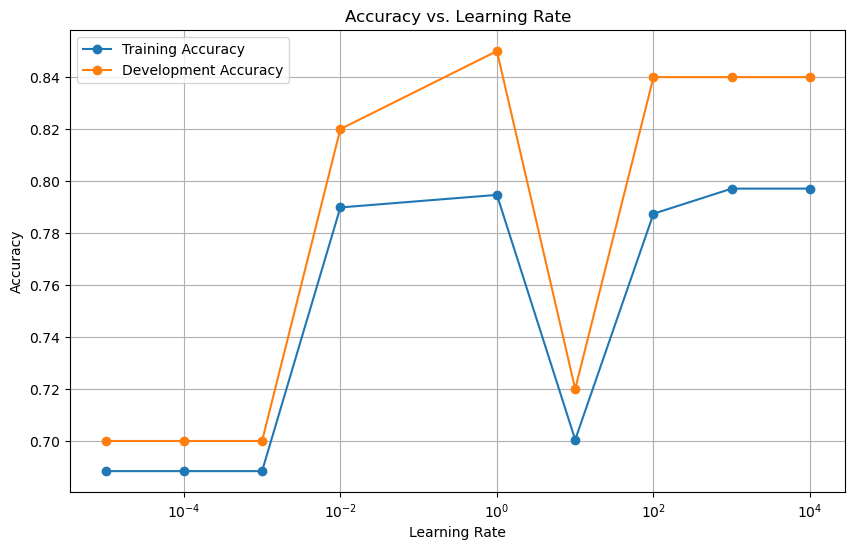

In [18]:
# we tried different values for learning rates to see whats better and we saved the accuracy of each alpha 
# to plot them next and our best was 0.1

learning_rates = [10000 ,1000, 100, 10, 1, 0.01, 0.001, 0.0001, 0.00001]
n_iter = 100
bsize = 16  

training_accuracies = []
development_accuracies = []

for alpha in learning_rates:
    try:
        w, b = win, bin
        w, b, W_hist, B_hist, hist = gradient_descent(X_train, y_train, w, b, alpha, n_iter, bsize)
        
        y_train_pred = predict(X_train, w, b)
        train_accuracy = accuracy(y_train, y_train_pred)
        
        y_dev_pred = predict(X_dev, w, b)
        dev_accuracy = accuracy(y_dev, y_dev_pred)
        
    except OverflowError:
        train_accuracy = 0
        dev_accuracy = 0

    training_accuracies.append(train_accuracy)
    development_accuracies.append(dev_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, training_accuracies, marker='o', label='Training Accuracy')
plt.plot(learning_rates, development_accuracies, marker='o', label='Development Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Q2

 Plot the training accuracy, the validation accuracy of your model as a function of the
number of gradient descent iterations for each learning rate of the three learning rates: 0.1, 0.001
.00001. The y-axis is the accuracy, the x-axis is the number of iterations. What have you observed?
Why? If any of the learning rate values above lead to divergence, choose an alternative one. 

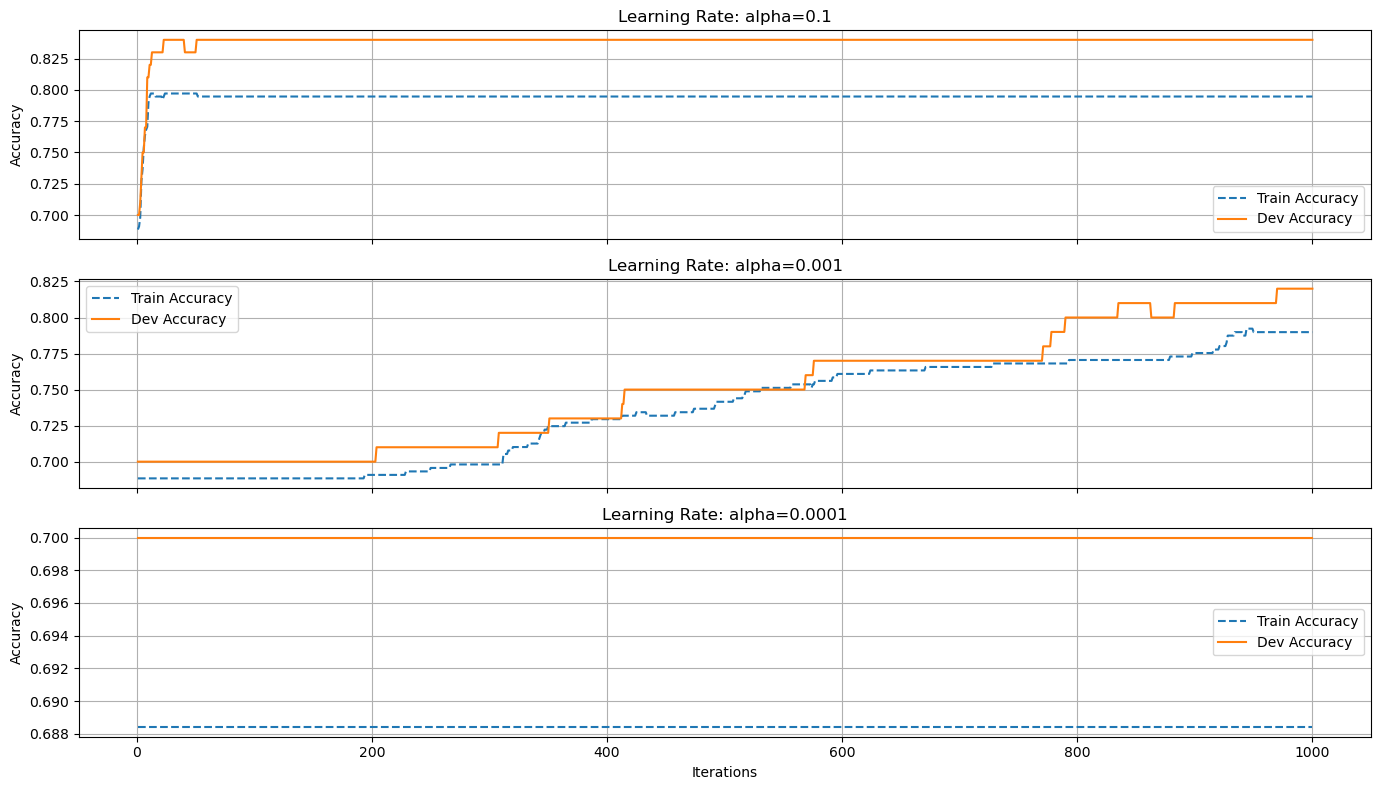

In [19]:
''' 
trying different alpha vals with the same n iterations so the only affecting factor is the 
alpha value we made a dictionary  with a dictionary inside (nested dictionaries) where we save the accuracy of the train and dev sets
for each learning rate same goes for loss in Q3
'''

alphalst = [0.1 , 0.001 , 0.0001]
n_iter = 1000
bsize = 16

accuracy_histories = {
    "train": {alpha: [] for alpha in alphalst},
    "dev": {alpha: [] for alpha in alphalst}
}
loss = {
    "train": {alpha: [] for alpha in alphalst},
    "dev": {alpha: [] for alpha in alphalst}
}

max_acc = 0
bst_w = win 
bst_b = bin

for alpha in alphalst:
    w, b = win, bin
    
    for i in range(1, n_iter + 1):
        w, b, W_hist, B_hist, hist = gradient_descent(X_train, y_train, w, b, alpha, 1, bsize) 
        
        y_train_pred = predict(X_train, w, b)
        train_accuracy = accuracy(y_train, y_train_pred)
        accuracy_histories["train"][alpha].append(train_accuracy)
        loss["train"][alpha].append(compute_cost_logistic(X_train ,y_train , w , b))


        y_dev_pred = predict(X_dev, w, b)
        dev_accuracy = accuracy(y_dev, y_dev_pred)
        accuracy_histories["dev"][alpha].append(dev_accuracy)
        loss["dev"][alpha].append(compute_cost_logistic(X_dev ,y_dev , w , b))

        # here we saved the best w and b so we can use it for the testing set in Q5
        
        if (dev_accuracy > max_acc):
           max_acc = dev_accuracy
           bst_w = w 
           bst_b = b 

num_plots = len(alphalst)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 8), sharex=True)

for ax, alpha in zip(axes, alphalst):
    ax.plot(range(1, n_iter + 1), accuracy_histories["train"][alpha], label='Train Accuracy', linestyle='--')
    ax.plot(range(1, n_iter + 1), accuracy_histories["dev"][alpha], label='Dev Accuracy', linestyle='-')
    ax.set_title(f'Learning Rate: alpha={alpha}')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()

plt.xlabel('Iterations')
plt.tight_layout()
plt.show()


## Q3

 repeat 2 by plotting the average training loss and the dev loss instead of the accuracy.
The training and the dev losses are computed by dividing the loss sums by the number of samples.


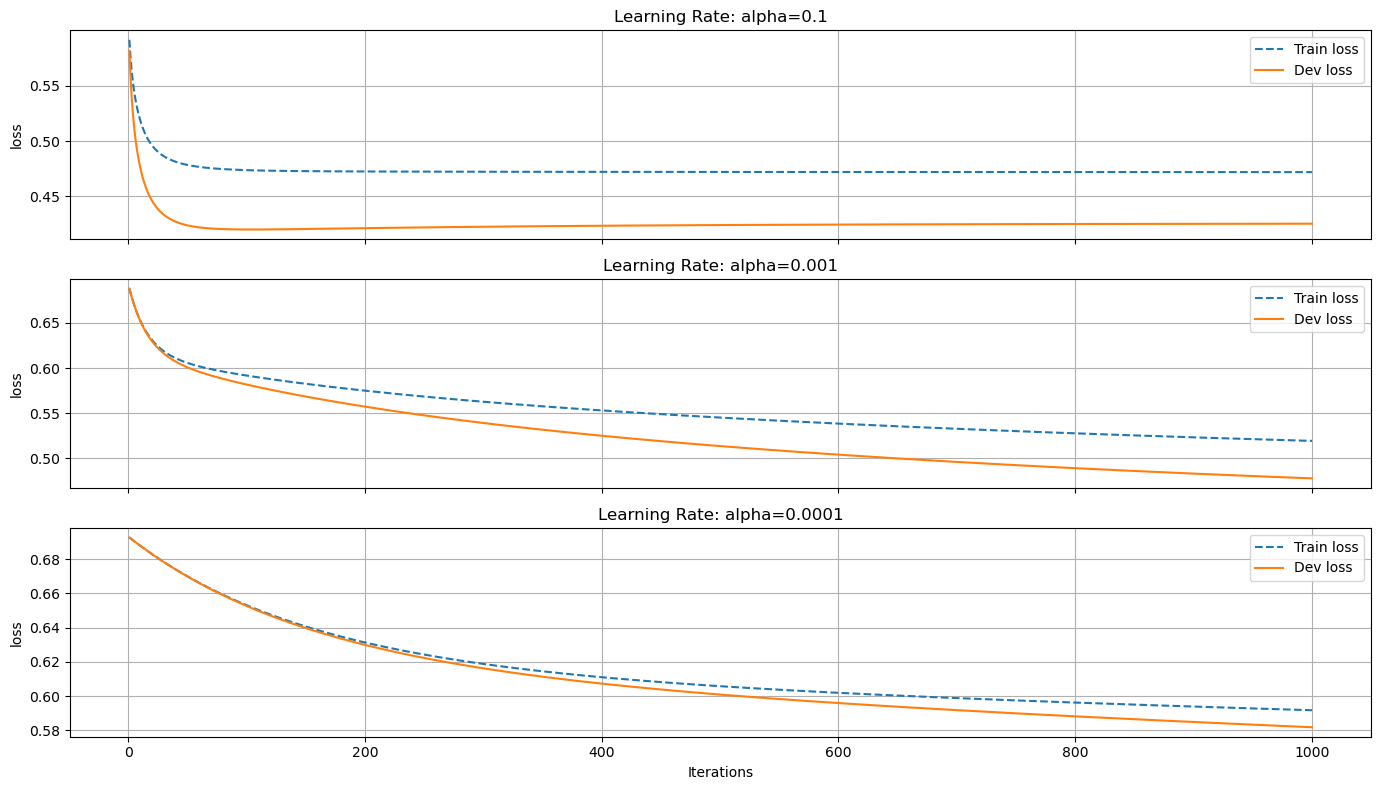

In [20]:
# values used here were found in the previous question 


num_plots = len(alphalst)
fig, axes = plt.subplots(num_plots, 1, figsize=(14, 8), sharex=True)

for ax, alpha in zip(axes, alphalst):
    ax.plot(range(1, n_iter + 1), loss["train"][alpha], label='Train loss', linestyle='--')
    ax.plot(range(1, n_iter + 1), loss["dev"][alpha], label='Dev loss', linestyle='-')
    ax.set_title(f'Learning Rate: alpha={alpha}')
    ax.set_ylabel('loss')
    ax.grid(True)
    ax.legend()

plt.xlabel('Iterations')
plt.tight_layout()
plt.show()

## Q4

Plot the validation accuracy as a function of learning rate (the ones that did not lead to
overflow)? What do you observe? Which learning rate gave you the best results. The y-axis is the
accuracy, the x-axis is the learning rate (bar charts or dot charts are good choices for this question). 

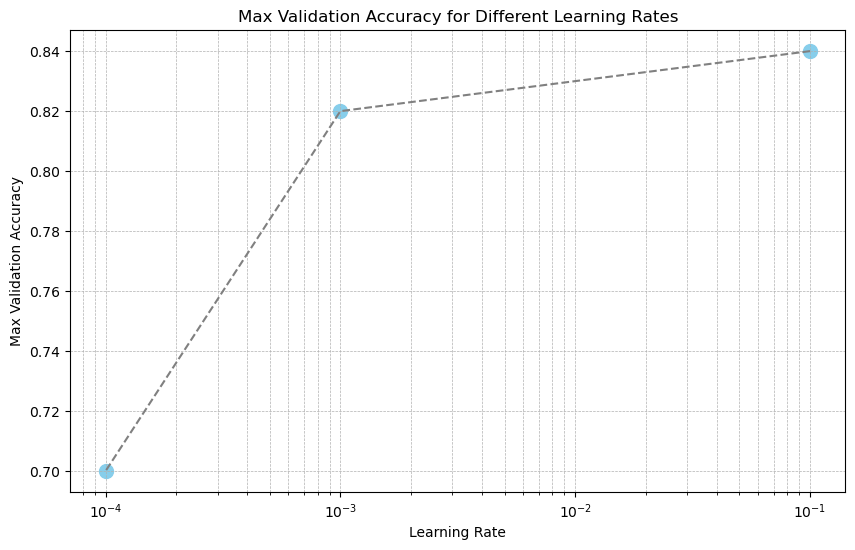

In [21]:
# the accuracies used here were also found in question 2 and we plotted the max accuracy for each alpha value 

max_dev_accuracies = {alpha: max(accuracy_histories["dev"][alpha]) for alpha in alphalst}

learning_rates = list(max_dev_accuracies.keys())
accuracies = list(max_dev_accuracies.values())

plt.figure(figsize=(10, 6))
plt.scatter(learning_rates, accuracies, color='skyblue', s=100)  
plt.plot(learning_rates, accuracies, color='gray', linestyle='--') 

plt.xlabel("Learning Rate")
plt.ylabel("Max Validation Accuracy")
plt.title("Max Validation Accuracy for Different Learning Rates")
plt.xscale('log') 
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

best_alpha = max(max_dev_accuracies, key=max_dev_accuracies.get)
best_accuracy = max_dev_accuracies[best_alpha]



## Q5

Report the testing accuracy that corresponds to the best learning rate (you decided from
the previous step).

In [22]:
print(f"The best learning rate is {best_alpha} with a validation accuracy of {best_accuracy:.2f}")
print(f"The testing accuracy of {accuracy(predict(X_test , bst_w , bst_b) , y_test):.2f}")

The best learning rate is 0.1 with a validation accuracy of 0.84
The testing accuracy of 0.82


## Q6

Try different batch sizes (4, 8, 16, 32, 64) and plot the validation Accuracy for these
values in one figure, which batch size gave the best performance?

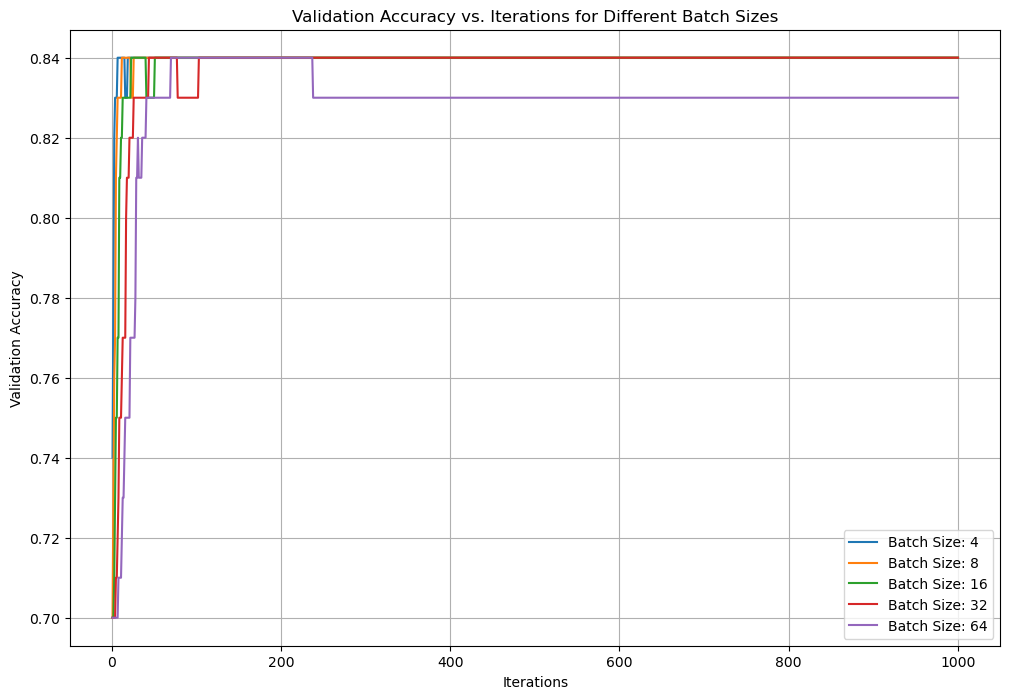

The best batch size is 4 with a validation accuracy of 0.84.


In [23]:
'''
Dictionary to store validation accuracy histories for each batch size 
we kept the best learning rate with the same number of iterations to insure that the best b size is picked
lambda was used as key for the max function to pick the batch size with the highest accuracy 
'''
alpha = 0.1
n_iter = 1000
batch_sizes = [4, 8, 16, 32, 64]

accuracy_histories_dev = {bsize: [] for bsize in batch_sizes}

for bsize in batch_sizes:
    w, b = win, bin 
    
    for i in range(1, n_iter + 1):
        w, b, W_hist, B_hist, hist = gradient_descent(X_train, y_train, w, b, alpha, 1, bsize)
        
        y_dev_pred = predict(X_dev, w, b)
        dev_accuracy = accuracy(y_dev, y_dev_pred)
        accuracy_histories_dev[bsize].append(dev_accuracy)

plt.figure(figsize=(12, 8))
for bsize in batch_sizes:
    plt.plot(range(1, n_iter + 1), accuracy_histories_dev[bsize], label=f'Batch Size: {bsize}')


plt.xlabel("Iterations")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs. Iterations for Different Batch Sizes")
plt.legend()
plt.grid(True)
plt.show()

best_bsize = max(batch_sizes, key=lambda b: max(accuracy_histories_dev[b]))
best_accuracy = max(accuracy_histories_dev[best_bsize])


print(f"The best batch size is {best_bsize} with a validation accuracy of {best_accuracy:.2f}.")

In [24]:
'''
########################################  TO PLOT ACCURACY IN Y-AXIS AND BSIZE IN X-AXIS  ########################################

alpha = 0.1
n_iter = 1000
batch_sizes = [4, 8, 16, 32, 64]

max_dev_accuracies = {}

for bsize in batch_sizes:
    w, b = win, bin  

    accuracy_dev = []
    for i in range(1, n_iter + 1):
        w, b, _, _, _ = gradient_descent(X_train, y_train, w, b, alpha, 1, bsize)
        
        y_dev_pred = predict(X_dev, w, b)
        dev_accuracy = accuracy(y_dev, y_dev_pred)
        accuracy_dev.append(dev_accuracy)
    
    max_dev_accuracies[bsize] = max(accuracy_dev)

batch_sizes = list(max_dev_accuracies.keys())
accuracies = list(max_dev_accuracies.values())

plt.figure(figsize=(10, 6))
plt.scatter(batch_sizes, accuracies, color='skyblue', s=100)  
plt.plot(batch_sizes, accuracies, color='gray', linestyle='--')

plt.xlabel("Batch Size")
plt.ylabel("Max Validation Accuracy")
plt.title("Max Validation Accuracy for Different Batch Sizes")
plt.grid(True)

plt.show()

best_bsize = max(batch_sizes, key=lambda b: max_dev_accuracies[b])
best_accuracy = max_dev_accuracies[best_bsize]
print(f"The best batch size is {best_bsize} with a maximum validation accuracy of {best_accuracy:.2f}.")
'''

'\n########################################  TO PLOT ACCURACY IN Y-AXIS AND BSIZE IN X-AXIS  ########################################\n\nalpha = 0.1\nn_iter = 1000\nbatch_sizes = [4, 8, 16, 32, 64]\n\nmax_dev_accuracies = {}\n\nfor bsize in batch_sizes:\n    w, b = win, bin  \n\n    accuracy_dev = []\n    for i in range(1, n_iter + 1):\n        w, b, _, _, _ = gradient_descent(X_train, y_train, w, b, alpha, 1, bsize)\n        \n        y_dev_pred = predict(X_dev, w, b)\n        dev_accuracy = accuracy(y_dev, y_dev_pred)\n        accuracy_dev.append(dev_accuracy)\n    \n    max_dev_accuracies[bsize] = max(accuracy_dev)\n\nbatch_sizes = list(max_dev_accuracies.keys())\naccuracies = list(max_dev_accuracies.values())\n\nplt.figure(figsize=(10, 6))\nplt.scatter(batch_sizes, accuracies, color=\'skyblue\', s=100)  \nplt.plot(batch_sizes, accuracies, color=\'gray\', linestyle=\'--\')\n\nplt.xlabel("Batch Size")\nplt.ylabel("Max Validation Accuracy")\nplt.title("Max Validation Accuracy for Diff

## Q7

Add L2 regularization to the implementation of gradient decent, what did you add to
your implementation? Did adding L2 regularization change to the best validation and testing
accuracy you have got? What is the value of 𝜆 you have chosen and why? Do you recommend using
regularization? Plot the training and the validation accuracy for different values of 𝜆, you the best
learning rate value you have obtained to do this part.


In [ ]:
def gradient_descent_reg(X, y, w_in, b_in, alpha, num_iters, bsize, lambda_): 
    """
    same as the functions used before but with regulariztion added in the error calculation for ridge regression 
    
    """
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    m = X.shape[0]
    
    for i in range(num_iters):
        for start_idx in range(0, m, bsize):
            end_idx = min(start_idx + bsize, m)
            X_batch = X[start_idx:end_idx]
            y_batch = y[start_idx:end_idx]
            de_db, de_dw = compute_gradient_logistic_reg(X_batch, y_batch, w, b, lambda_)

            # Update parameters
            w -= alpha * de_dw
            b -= alpha * de_db

        # Record history for every iteration
        J_history.append(compute_cost_logistic_reg(X, y, w, b, lambda_))

    return w, b, J_history

def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
        lambda_ here is the Regularization parameter
    """
    m = X.shape[0]
    f_wb = sigmoid(X.dot(w) + b)
    err = f_wb - y
    
    de_dw = (X.T.dot(err)) / m + (lambda_ / m) * w  # lambda was added here
    de_db = np.sum(err) / m

    return de_db, de_dw  

def compute_cost_logistic_reg(X, y, w, b, lambda_):
    
    m = X.shape[0]
    z = X.dot(w) + b
    f_wb = sigmoid(z)
    f_wb = np.clip(f_wb, 1e-15, 1 - 1e-15)
    cost = -np.mean(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))

    # Add regularization term
    reg_cost = (lambda_ / (2 * m)) * np.sum(np.square(w))
    cost += reg_cost
    
    return cost


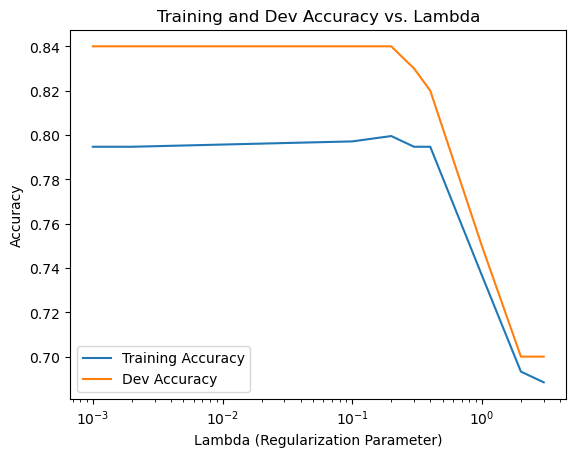

In [26]:

lambda_values = [0.001 , 0.002 ,0.1, 0.2, 0.3, 0.4, 1 , 2 , 3]
train_accuracies = []
dev_accuracies = []
bsize = 16
num_iters = 100

for lambda_ in lambda_values:
    w, b, hist = gradient_descent_reg(X_train, y_train, win, bin, alpha=best_alpha, num_iters=num_iters, bsize=bsize, lambda_=lambda_)
    
    train_accuracy = accuracy(predict(X_train, w, b), y_train)
    dev_accuracy = accuracy(predict(X_dev, w, b), y_dev)
    
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)


plt.plot(lambda_values, train_accuracies, label='Training Accuracy')
plt.plot(lambda_values, dev_accuracies, label='Dev Accuracy')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Training and Dev Accuracy vs. Lambda')
plt.legend()
plt.xscale('log') 
plt.show()


## Q8

train a model without data normalization, does it work? Is it easy to train? Did you need
more iterations? Explain your observation? Which rate of learning works the best for unnormalized
data? Do similar plot for 3 learning rate values of your choice like the plots in part Q1.

C:\Users\munis\AppData\Local\Temp\ipykernel_24092\3761434816.py:5: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\munis\AppData\Local\Temp\ipykernel_24092\896660024.py:10: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-vals))


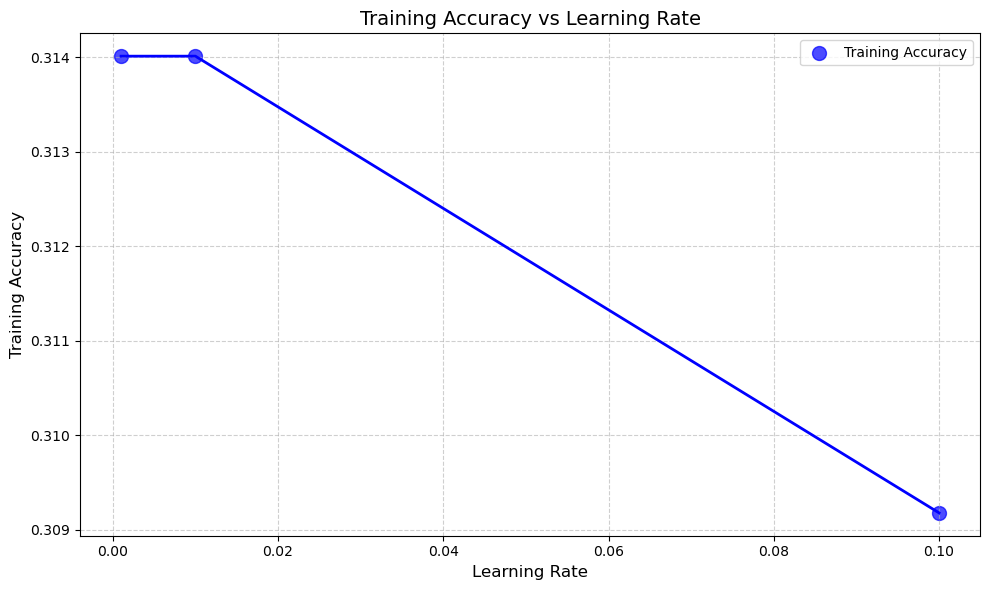

In [27]:
''' 
we already saved the data before the normalization so we just trained the model using it and got the values and plotted them 

'''

X_train = dftr.drop(columns=['Loan_ID', 'Loan_Status'])
y_train = dftr['Loan_Status']

X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.astype(float)
y_train = pd.to_numeric(y_train, errors='coerce')

X_train = X_train.values
y_train = y_train.values

learning_rates = [0.001, 0.01, 0.1]
n_iter = 100
bsize = 16

train_accuracies = []
J_histories = []

for alpha in learning_rates:
    w, b, W_hist, B_hist, hist = gradient_descent(X_train, y_train, win, bin, alpha, n_iter, bsize)
    
    train_accuracy = accuracy(predict(X_train, w, b), y_train)
    train_accuracies.append(train_accuracy)
    
    J_histories.append(hist)


plt.figure(figsize=(10, 6))
plt.scatter(learning_rates, train_accuracies, color='blue', s=100, alpha=0.7, label='Training Accuracy')
plt.plot(learning_rates, train_accuracies, color='blue', linestyle='-', linewidth=2)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Training Accuracy', fontsize=12)
plt.title('Training Accuracy vs Learning Rate', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()



